In [23]:
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt

import h5py
import tables

In [24]:
file_name = "/scratch9/mkron/data/training_data/second_dataset/File_1.h5"
if os.path.exists(file_name):
    file = h5py.File(file_name, "r+")
else:
    print "File does not exist"

#### Clculate dN/dE

In [33]:
# claculation of the histogramm for each class
deposited_energy = file["reco_vals"]["depositedE"]
classification = file["reco_vals"]["ClassificationLabel"]
binnumber = 100


ibins = np.linspace(0,8,binnumber)
vals_1, bins_1 = np.histogram(np.log10(deposited_energy[classification == 1.0]), bins=ibins)
vals_2, bins_2 = np.histogram(np.log10(deposited_energy[classification == 2.0]), bins=ibins)
vals_3, bins_3 = np.histogram(np.log10(deposited_energy[classification == 3.0]), bins=ibins)

#ibins = np.linspace(0,100000000,binnumber)
#vals_1, bins_1 = np.histogram(deposited_energy[classification == 1.0], bins=ibins)
#vals_2, bins_2 = np.histogram(deposited_energy[classification == 2.0], bins=ibins)
#vals_3, bins_3 = np.histogram(deposited_energy[classification == 3.0], bins=ibins)


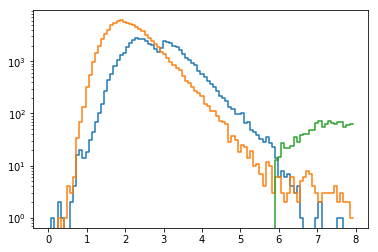

In [35]:
plt.semilogy(bins_1[:-1], vals_1, drawstyle='steps-pre', label=1)
plt.semilogy(bins_2[:-1], vals_2, drawstyle='steps-pre', label=2)
plt.semilogy(bins_3[:-1], vals_3, drawstyle='steps-pre', label=3)
plt.show()

In [44]:
# Event caracteristics
i = 15
deposited_energy_event = file["reco_vals"]["depositedE"][i]
classification_event = file["reco_vals"]["ClassificationLabel"][i]
print deposited_energy_event
print classification_event
deposited_energy_event = np.log10(deposited_energy_event)

49832562.1646
3.0


In [46]:
def weight_event(classification_event, deposited_energy_event):
    if classification_event == 1.0:
        N_bin = vals_1[np.digitize(deposited_energy_event, bins_1)]
    elif classification_event == 2.0:
        N_bin = vals_2[np.digitize(deposited_energy_event, bins_2)]
    else: 
        N_bin = vals_3[np.digitize(deposited_energy_event, bins_3)]
    return 1./N_bin
